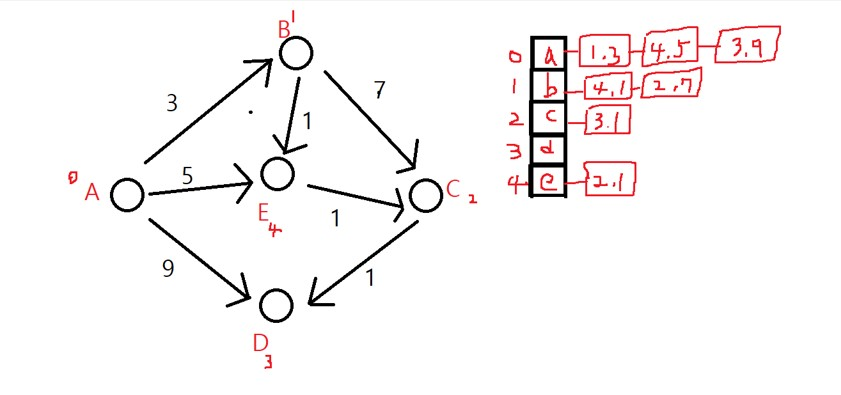

입력
```plain text
5       
7       
0 1 3
0 4 5
0 3 9
1 4 1
1 2 7
2 3 1
4 2 1
0 3
```
출력
```plain text
6
```

In [ ]:
import heapq

N = int(input())  # 정점 개수
M = int(input())  # 간선 개수

# 인접 리스트 만들고 입력 받기
arr = [[] for _ in range(N)]
for _ in range(M):
    a, b, c = map(int, input().split())  # 출발, 도착, 비용
    arr[a].append((b, c))

start, end = map(int, input().split())  # 시작점, 도착점

# 다익스트라 세팅
name = 'ABCDE'
inf = int(21e8)
result = [inf]*N
result[start] = 0  # 시작인덱스가 첫 경유지 -> 시작 인덱스에 해당하는 경유지 까지의 비용을 0으로 초기 세팅
heap = []  # 경유지를 우선순위 큐로 뽑을 heap 생성

def dijkstra(start):
    heapq.heappush(heap, (start, 0))  # 경유지 index, 비용

    # 경유지 선택이 끝날 때까지 반복
    while heap:
        k, sk = heapq.heappop(heap)  # 경유지, 경유지까지의 비용

        # 이미 갱신되어 있는 값이 뽑은 값보다 작으면 비교할 필요 없음
        if result[k] < sk:
            continue

        # 경유지에서 다른 도착점까지 갈 수 있는 횟수만큼 인접리스트 탐색
        for i in arr[k]:
            cost = sk + i[1]  # cost = 시작 -> 경유 -> 도착 vs result[i[0]] = 시작점 -> 도착
            if cost < result[i[0]]:
                result[i[0]] = cost  # 갱신해주고
                heapq.heappush(heap, (i[0], cost))  # heap에 푸쉬

dijkstra(start)
print(result)
print(result[end])